##Loading Packages and Data

In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Load the data
data = pd.read_csv('Train.csv')


##Data Structure and Content

In [185]:
# Check the shape of the dataset
data.shape

(8523, 12)

In [186]:
# Check the first few rows
data.head(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           FDX07       19.200          Regular         0.000000   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   
6           FDO10       13.650          Regular         0.012741   
7           FDP10          NaN          Low Fat         0.127470   
8           FDH17       16.200          Regular         0.016687   
9           FDU28       19.200          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   
5           Baking Goods   51.4008            OUT018   
6            Snack Foods   57.6588            OUT013   
7            Snack Foods  107.7622            OUT027   
8           Frozen Foods   96.9726            OUT045   
9           Frozen Foods  187.8214            OUT017   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   
5                       2009      Medium               Tier 3   
6                       1987        High               Tier 3   
7                       1985      Medium               Tier 3   
8                       2002         NaN               Tier 2   
9                       2007         NaN               Tier 2   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052  
5  Supermarket Type2           556.6088  
6  Supermarket Type1           343.5528  
7  Supermarket Type3          4022.7636  
8  Supermarket Type1          1076.5986  
9  Supermarket Type1          4710.5350

The file contains the following columns:

- `Item_Identifier`: unique product ID
- `Item_Weight`: weight of product
- `Item_Fat_Content`: whether the product is low fat or regular
- `Item_Visibility`: the percentage of total display area of all products in a store allocated to the particular product
- `Item_Type`: the category to which the product belongs
- `Item_MRP`: maximum retail price of the product
- `Outlet_Identifier`: unique store ID
- `Outlet_Establishment_Year`: the year in which the store was established
- `Outlet_Size`: the size of the store in terms of ground area covered
- `Outlet_Location_Type`: the type of city in which the store is located
- `Outlet_Type`: whether the outlet is just a grocery store or some sort of supermarket
- `Item_Outlet_Sales`: sales of the product in the particular store. This is the target variable.

In [187]:
# Data types and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Missing Value Treatment

In [188]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [189]:
dropped = data.dropna()
dropped.shape

(4650, 12)

As you can see, If we drop the raws which have NaN values, We loose about half of the data. So, We try fill the NaN values by using some methods. Meanwhile, we also correct the incorrect values.

In [190]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [191]:
# replace incorrect values with correct ones using a dictionary
fat_content_dict = {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(fat_content_dict)
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [192]:
data.groupby(['Item_Type', 'Item_Fat_Content']).mean()


<ipython-input-192-93c929561fcf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['Item_Type', 'Item_Fat_Content']).mean()


Item_Weight  Item_Visibility  \
Item_Type             Item_Fat_Content                                 
Baking Goods          Low Fat             12.552996         0.066150   
                      Regular             12.013303         0.072283   
Breads                Low Fat             12.429912         0.067815   
                      Regular             10.002143         0.064287   
Breakfast             Low Fat             11.849412         0.091970   
                      Regular             13.336182         0.082011   
Canned                Low Fat             11.864650         0.072913   
                      Regular             12.804289         0.062833   
Dairy                 Low Fat             13.391497         0.069884   
                      Regular             13.483797         0.076454   
Frozen Foods          Low Fat             12.580333         0.059118   
                      Regular             13.180539         0.072880   
Fruits and Vegetables Low Fat             12.757046         0.066488   
                      Regular             13.708363         0.070632   
Hard Drinks           Low Fat             11.400328         0.064943   
Health and Hygiene    Low Fat             13.142314         0.055216   
Household             Low Fat             13.384736         0.061322   
Meat                  Low Fat             13.565644         0.056635   
                      Regular             12.335512         0.066050   
Others                Low Fat             13.853285         0.060241   
Seafood               Low Fat             13.805345         0.049211   
                      Regular             10.901818         0.110284   
Snack Foods           Low Fat             13.707177         0.069842   
                      Regular             12.027116         0.062774   
Soft Drinks           Low Fat             11.963444         0.062768   
                      Regular             11.228220         0.070315   
Starchy Foods         Low Fat             13.752432         0.066658   
                      Regular             13.609196         0.068688   

                                          Item_MRP  Outlet_Establishment_Year  \
Item_Type             Item_Fat_Content                                          
Baking Goods          Low Fat           120.525869                1997.310030   
                      Regular           132.419203                1998.159875   
Breads                Low Fat           134.582184                1997.592857   
                      Regular           148.987514                1997.738739   
Breakfast             Low Fat           165.259673                1997.292683   
                      Regular           127.841304                1997.362319   
Canned                Low Fat           139.552518                1998.372434   
                      Regular           139.997787                1997.909091   
Dairy                 Low Fat           147.115989                1997.772727   
                      Regular           150.689305                1997.537879   
Frozen Foods          Low Fat           139.019490                1997.828889   
                      Regular           137.931307                1998.241379   
Fruits and Vegetables Low Fat           136.558069                1997.695238   
                      Regular           152.977571                1997.745847   
Hard Drinks           Low Fat           137.077928                1998.177570   
Health and Hygiene    Low Fat           130.818921                1997.734615   
Household             Low Fat           149.424753                1997.784615   
Meat                  Low Fat           130.998788                1997.311765   
                      Regular           145.804195                1997.360784   
Others                Low Fat           132.851430                1997.662722   
Seafood               Low Fat           113.508557                1997.189189   
                

In [193]:
# group by Item_Identifier and Outlet_Identifier and compute mean of Item_Weight for each group
data.groupby(['Item_Type', 'Item_Fat_Content'])['Item_Weight'].mean()


Item_Type              Item_Fat_Content
Baking Goods           Low Fat             12.552996
                       Regular             12.013303
Breads                 Low Fat             12.429912
                       Regular             10.002143
Breakfast              Low Fat             11.849412
                       Regular             13.336182
Canned                 Low Fat             11.864650
                       Regular             12.804289
Dairy                  Low Fat             13.391497
                       Regular             13.483797
Frozen Foods           Low Fat             12.580333
                       Regular             13.180539
Fruits and Vegetables  Low Fat             12.757046
                       Regular             13.708363
Hard Drinks            Low Fat             11.400328
Health and Hygiene     Low Fat             13.142314
Household              Low Fat             13.384736
Meat                   Low Fat             13.565644
      

In [194]:
# compute mean of Item_Weight for each Item_Identifier
item_means = data.groupby(['Item_Type', 'Item_Fat_Content'])['Item_Weight'].mean()

# fill NaN values with mean weights using loc
data.loc[data['Item_Weight'].isnull(), 'Item_Weight'] = data.loc[data['Item_Weight'].isnull(), ['Item_Type', 'Item_Fat_Content']].apply(lambda x: item_means[x['Item_Type'], x['Item_Fat_Content']], axis=1)

In [195]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Now, we gonna treat the Nan values in the `Outlet_Size` Column

In [196]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [197]:
# compute mode value of Outlet_Size

data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [198]:
data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0], inplace=True)

In [199]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [200]:
data.head(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15     9.300000          Low Fat         0.016047   
1           DRC01     5.920000          Regular         0.019278   
2           FDN15    17.500000          Low Fat         0.016760   
3           FDX07    19.200000          Regular         0.000000   
4           NCD19     8.930000          Low Fat         0.000000   
5           FDP36    10.395000          Regular         0.000000   
6           FDO10    13.650000          Regular         0.012741   
7           FDP10    13.707177          Low Fat         0.127470   
8           FDH17    16.200000          Regular         0.016687   
9           FDU28    19.200000          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   
5           Baking Goods   51.4008            OUT018   
6            Snack Foods   57.6588            OUT013   
7            Snack Foods  107.7622            OUT027   
8           Frozen Foods   96.9726            OUT045   
9           Frozen Foods  187.8214            OUT017   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   
5                       2009      Medium               Tier 3   
6                       1987        High               Tier 3   
7                       1985      Medium               Tier 3   
8                       2002      Medium               Tier 2   
9                       2007      Medium               Tier 2   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052  
5  Supermarket Type2           556.6088  
6  Supermarket Type1           343.5528  
7  Supermarket Type3          4022.7636  
8  Supermarket Type1          1076.5986  
9  Supermarket Type1          4710.5350

##Univariate Analysis:
We will analyze the distribution of each variable

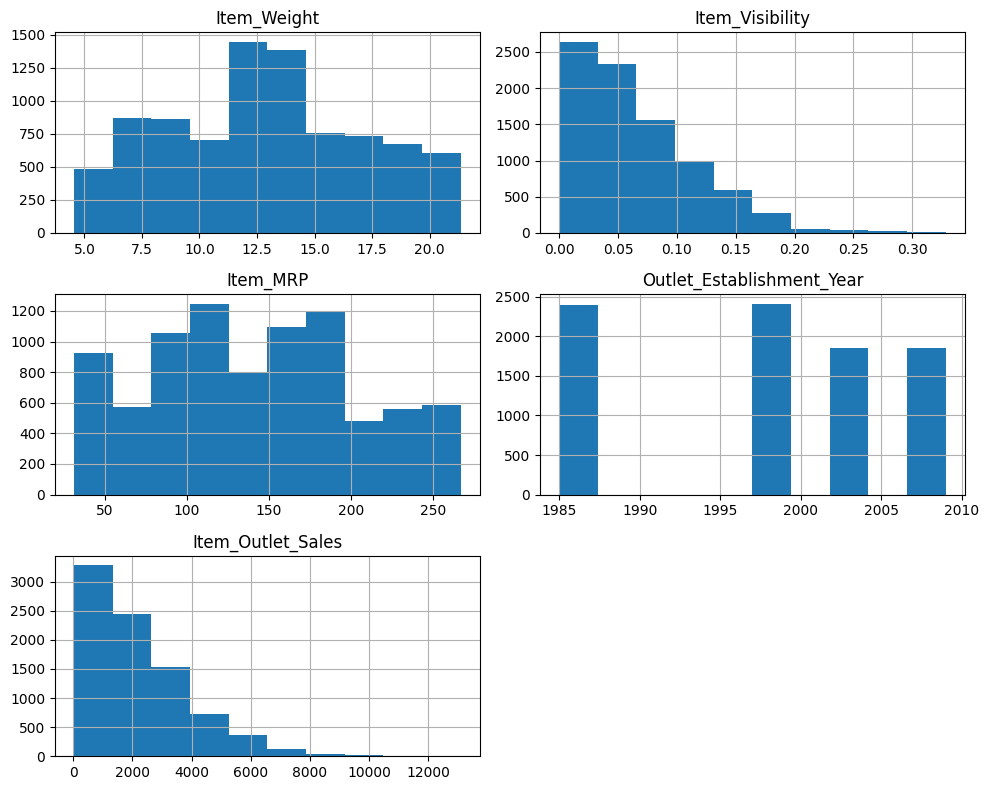

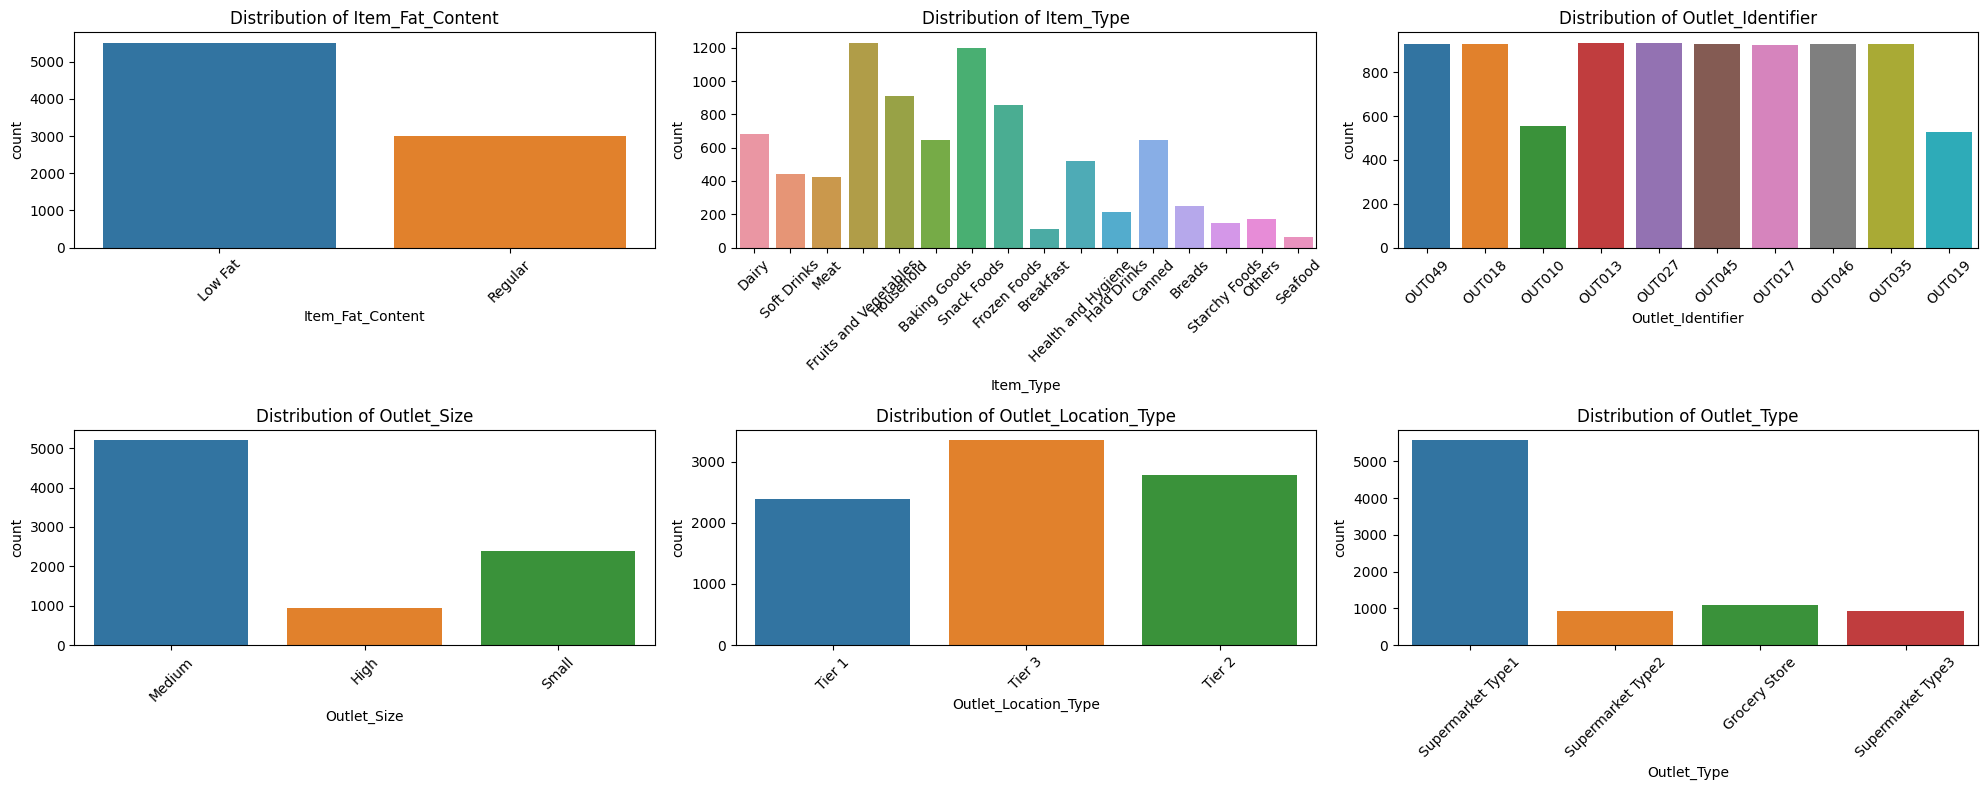

In [201]:
# Histograms for numeric variables
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# List of categorical variables
categorical_vars = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Bar plots for categorical variables
fig, axes = plt.subplots(2, 3, figsize=(20, 8))

for idx, col in enumerate(categorical_vars):
    row = idx // 3
    col_idx = idx % 3
    sns.countplot(x=col, data=data, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Analyze the relationships of variables with `Item_Outlet_Sales`:

In [202]:
data.corrwith(data['Item_Outlet_Sales']).abs().sort_values(ascending=False)

<ipython-input-202-6ba8c7a4e74b>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corrwith(data['Item_Outlet_Sales']).abs().sort_values(ascending=False)


Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Visibility              0.128625
Outlet_Establishment_Year    0.049135
Item_Weight                  0.012523
dtype: float64

##Feature Engineering
Create new features that might help improve the model's performance

In [203]:
# Extract the first two characters from the Item_Identifier to create a new variable
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

# Create a new variable for the years of operation of a store
data['Years_of_Operation'] = data['Outlet_Establishment_Year'].apply(lambda x: 2023 - x)


In [204]:
data.head(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15     9.300000          Low Fat         0.016047   
1           DRC01     5.920000          Regular         0.019278   
2           FDN15    17.500000          Low Fat         0.016760   
3           FDX07    19.200000          Regular         0.000000   
4           NCD19     8.930000          Low Fat         0.000000   
5           FDP36    10.395000          Regular         0.000000   
6           FDO10    13.650000          Regular         0.012741   
7           FDP10    13.707177          Low Fat         0.127470   
8           FDH17    16.200000          Regular         0.016687   
9           FDU28    19.200000          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   
5           Baking Goods   51.4008            OUT018   
6            Snack Foods   57.6588            OUT013   
7            Snack Foods  107.7622            OUT027   
8           Frozen Foods   96.9726            OUT045   
9           Frozen Foods  187.8214            OUT017   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   
5                       2009      Medium               Tier 3   
6                       1987        High               Tier 3   
7                       1985      Medium               Tier 3   
8                       2002      Medium               Tier 2   
9                       2007      Medium               Tier 2   

         Outlet_Type  Item_Outlet_Sales Item_Type_Combined  Years_of_Operation  
0  Supermarket Type1          3735.1380                 FD                  24  
1  Supermarket Type2           443.4228                 DR                  14  
2  Supermarket Type1          2097.2700                 FD                  24  
3      Grocery Store           732.3800                 FD                  25  
4  Supermarket Type1           994.7052                 NC                  36  
5  Supermarket Type2           556.6088                 FD                  14  
6  Supermarket Type1           343.5528                 FD                  36  
7  Supermarket Type3          4022.7636                 FD                  38  
8  Supermarket Type1          1076.5986                 FD                  21  
9  Supermarket Type1          4710.5350                 FD                  16

##Drop unnecessary columns

In [205]:

data.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Type'], axis=1, inplace=True)

In [206]:
data

Item_Weight Item_Fat_Content  Item_Visibility  Item_MRP Outlet_Size  \
0           9.300          Low Fat         0.016047  249.8092      Medium   
1           5.920          Regular         0.019278   48.2692      Medium   
2          17.500          Low Fat         0.016760  141.6180      Medium   
3          19.200          Regular         0.000000  182.0950      Medium   
4           8.930          Low Fat         0.000000   53.8614        High   
...           ...              ...              ...       ...         ...   
8518        6.865          Low Fat         0.056783  214.5218        High   
8519        8.380          Regular         0.046982  108.1570      Medium   
8520       10.600          Low Fat         0.035186   85.1224       Small   
8521        7.210          Regular         0.145221  103.1332      Medium   
8522       14.800          Low Fat         0.044878   75.4670       Small   

     Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0                  Tier 1  Supermarket Type1          3735.1380   
1                  Tier 3  Supermarket Type2           443.4228   
2                  Tier 1  Supermarket Type1          2097.2700   
3                  Tier 3      Grocery Store           732.3800   
4                  Tier 3  Supermarket Type1           994.7052   
...                   ...                ...                ...   
8518               Tier 3  Supermarket Type1          2778.3834   
8519               Tier 2  Supermarket Type1           549.2850   
8520               Tier 2  Supermarket Type1          1193.1136   
8521               Tier 3  Supermarket Type2          1845.5976   
8522               Tier 1  Supermarket Type1           765.6700   

     Item_Type_Combined  Years_of_Operation  
0                    FD                  24  
1                    DR                  14  
2                    FD                  24  
3                    FD                  25  
4                    NC                  36  
...                 ...                 ...  
8518                 FD                  36  
8519                 FD                  21  
8520                 NC                  19  
8521                 FD                  14  
8522                 DR                  26  

[8523 rows x 10 columns]

##Label Encoding


In [207]:
le = LabelEncoder()

cat= ("Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type", "Item_Type_Combined")
for i in cat:
    le= LabelEncoder()
    data[i]= le.fit_transform(data[i].values)

data

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
0           9.300                 0         0.016047  249.8092            1   
1           5.920                 1         0.019278   48.2692            1   
2          17.500                 0         0.016760  141.6180            1   
3          19.200                 1         0.000000  182.0950            1   
4           8.930                 0         0.000000   53.8614            0   
...           ...               ...              ...       ...          ...   
8518        6.865                 0         0.056783  214.5218            0   
8519        8.380                 1         0.046982  108.1570            1   
8520       10.600                 0         0.035186   85.1224            2   
8521        7.210                 1         0.145221  103.1332            1   
8522       14.800                 0         0.044878   75.4670            2   

      Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  \
0                        0            1          3735.1380   
1                        2            2           443.4228   
2                        0            1          2097.2700   
3                        2            0           732.3800   
4                        2            1           994.7052   
...                    ...          ...                ...   
8518                     2            1          2778.3834   
8519                     1            1           549.2850   
8520                     1            1          1193.1136   
8521                     2            2          1845.5976   
8522                     0            1           765.6700   

      Item_Type_Combined  Years_of_Operation  
0                      1                  24  
1                      0                  14  
2                      1                  24  
3                      1                  25  
4                      2                  36  
...                  ...                 ...  
8518                   1                  36  
8519                   1                  21  
8520                   2                  19  
8521                   1                  14  
8522                   0                  26  

[8523 rows x 10 columns]

##PreProcessing Data

In [208]:
#Split the data into training and testing sets.
scaler = StandardScaler()
X = data.drop('Item_Outlet_Sales', axis=1)

X_scaled = scaler.fit_transform(X)
y = data['Item_Outlet_Sales']

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modeling

### Linear Regression:

In [209]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mae_lr = round(mean_absolute_error(y_test,y_pred))
mse_lr= mean_squared_error(y_test, y_pred)
rmse_lr = round(np.sqrt(mse_lr))
r2_lr = round(lr.score(X_train,y_train) * 100,2)

print(f"MAE: {mae_lr}")
print(f"RMSE: {rmse_lr}")
print(f"R-squared: {r2_lr}")


MAE: 856
RMSE: 1137
R-squared: 50.38


In [210]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
mae_rid = round(mean_absolute_error(y_test,y_pred))
mse_rid = mean_squared_error(y_test, y_pred)
rmse_rid = round(np.sqrt(mse_rid))
r2_rid = round(ridge.score(X_train,y_train) * 100,2)

print(f"MAE: {mae_rid}")
print(f"RMSE: {rmse_rid}")
print(f"R-squared: {r2_rid}")


MAE: 856
RMSE: 1137
R-squared: 50.38


In [211]:
# Lasso Regression
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mae_las = round(mean_absolute_error(y_test,y_pred))
mse_las = mean_squared_error(y_test, y_pred)
rmse_las = round(np.sqrt(mse_las))
r2_las = round(lasso.score(X_train,y_train) * 100,2)

print(f"MAE: {mae_las}")
print(f"RMSE: {rmse_las}")
print(f"R-squared: {r2_las}")

MAE: 856
RMSE: 1137
R-squared: 50.38


In [212]:
# Hyperparameter tuning for RandomForestRegressor
rf_params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(rf, rf_params, scoring='neg_mean_squared_error', cv=3, n_iter=10, verbose=0, random_state=42)
rf_random.fit(X_train, y_train)

print("Best parameters for RandomForestRegressor: ", rf_random.best_params_)

Best parameters for RandomForestRegressor:  {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 5}


In [213]:
rf = RandomForestRegressor(n_estimators= 400, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
mae_rf = round(mean_absolute_error(y_test,y_pred))
mse_rf = mean_squared_error(y_test, y_pred)
rmse_rf = round(np.sqrt(mse_rf))
r2_rf = round(rf.score(X_train,y_train) * 100,2)

print(f"MAE: {mae_rf}")
print(f"RMSE: {rmse_rf}")
print(f"R-squared: {r2_rf}")


MAE: 758
RMSE: 1084
R-squared: 93.91


In [214]:
# Hyperparameter tuning for XGBoost
xgb_params = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.5, 0.7, 0.9],
    'colsample_bytree': [0.5, 0.7, 0.9]
}

xgb = XGBRegressor(random_state=42)
xgb_random = RandomizedSearchCV(xgb, xgb_params, scoring='neg_mean_squared_error', cv=3, n_iter=10, verbose=0, random_state=42)
xgb_random.fit(X_train, y_train)

print("Best parameters for XGBoost: ", xgb_random.best_params_)


Best parameters for XGBoost:  {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.5}


In [215]:
xgb = XGBRegressor(n_estimators=200, random_state=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
mae_xgb = round(mean_absolute_error(y_test,y_pred))
mse_xgb = mean_squared_error(y_test, y_pred)
rmse_xgb = round(np.sqrt(mse_xgb))
r2_xgb = round(xgb.score(X_train,y_train) * 100,2)

print(f"MAE: {mae_xgb}")
print(f"RMSE: {rmse_xgb}")
print(f"R-squared: {r2_xgb}")

MAE: 791
RMSE: 1127
R-squared: 91.97


In [216]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest', 'XGBoost'],
    'MAE': [mae_lr, mae_rid, mae_las, mae_rf, mae_xgb],
    'RMSE': [rmse_lr, rmse_rid, rmse_las, rmse_rf, rmse_xgb],
    'R-squared': [r2_lr, r2_rid, r2_las, r2_rf, r2_xgb]
})

results.sort_values(by='RMSE', ascending=True, inplace=True)
print(results)


               Model  MAE  RMSE  R-squared
3      Random Forest  758  1084      93.91
4            XGBoost  791  1127      91.97
0  Linear Regression  856  1137      50.38
1   Ridge Regression  856  1137      50.38
2   Lasso Regression  856  1137      50.38


##Final Predictions On The Test Dataset

In [217]:
df = pd.read_csv('Test.csv')
test = df

In [218]:
# Check the shape of the testset
test.shape

(5681, 11)

In [219]:
test.head(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDW58       20.750          Low Fat         0.007565   
1           FDW14        8.300              reg         0.038428   
2           NCN55       14.600          Low Fat         0.099575   
3           FDQ58        7.315          Low Fat         0.015388   
4           FDY38          NaN          Regular         0.118599   
5           FDH56        9.800          Regular         0.063817   
6           FDL48       19.350          Regular         0.082602   
7           FDC48          NaN          Low Fat         0.015782   
8           FDN33        6.305          Regular         0.123365   
9           FDA36        5.985          Low Fat         0.005698   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198            OUT017   
2                 Others  241.7538            OUT010   
3            Snack Foods  155.0340            OUT017   
4                  Dairy  234.2300            OUT027   
5  Fruits and Vegetables  117.1492            OUT046   
6           Baking Goods   50.1034            OUT018   
7           Baking Goods   81.0592            OUT027   
8            Snack Foods   95.7436            OUT045   
9           Baking Goods  186.8924            OUT017   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2007         NaN               Tier 2   
2                       1998         NaN               Tier 3   
3                       2007         NaN               Tier 2   
4                       1985      Medium               Tier 3   
5                       1997       Small               Tier 1   
6                       2009      Medium               Tier 3   
7                       1985      Medium               Tier 3   
8                       2002         NaN               Tier 2   
9                       2007         NaN               Tier 2   

         Outlet_Type  
0  Supermarket Type1  
1  Supermarket Type1  
2      Grocery Store  
3  Supermarket Type1  
4  Supermarket Type3  
5  Supermarket Type1  
6  Supermarket Type2  
7  Supermarket Type3  
8  Supermarket Type1  
9  Supermarket Type1

In [220]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [221]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [222]:
test['Item_Fat_Content'].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

As it clear that in Testset, there are the same problems with the Trainset. So, we gonna use same method to prepare the Testset to use for the prediction.

In [223]:
# replace incorrect values with correct ones using a dictionary
fat_content_dict = {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace(fat_content_dict)
test['Item_Fat_Content'].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [224]:
# compute mean of Item_Weight for each Item_Identifier
item_means = test.groupby(['Item_Type', 'Item_Fat_Content'])['Item_Weight'].mean()

# fill NaN values with mean weights using loc
test.loc[test['Item_Weight'].isnull(), 'Item_Weight'] = test.loc[test['Item_Weight'].isnull(), ['Item_Type', 'Item_Fat_Content']].apply(lambda x: item_means[x['Item_Type'], x['Item_Fat_Content']], axis=1)

In [225]:
# compute mode value of Outlet_Size

test['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [226]:
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0], inplace=True)

In [227]:
test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [228]:
# Extract the first two characters from the Item_Identifier to create a new variable
test['Item_Type_Combined'] = test['Item_Identifier'].apply(lambda x: x[0:2])

# Create a new variable for the years of operation of a store
test['Years_of_Operation'] = test['Outlet_Establishment_Year'].apply(lambda x: 2023 - x)


In [229]:
#Drop unnecessary columns
test.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Item_Type'], axis=1, inplace=True)

In [230]:
#Label Encoding
le = LabelEncoder()

cat= ("Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type", "Item_Type_Combined")
for i in cat:
    le= LabelEncoder()
    test[i]= le.fit_transform(test[i].values)

test

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
0       20.750000                 0         0.007565  107.8622            1   
1        8.300000                 1         0.038428   87.3198            1   
2       14.600000                 0         0.099575  241.7538            1   
3        7.315000                 0         0.015388  155.0340            1   
4       12.390955                 1         0.118599  234.2300            1   
...           ...               ...              ...       ...          ...   
5676    10.500000                 1         0.013496  141.3154            2   
5677     7.600000                 1         0.142991  169.1448            1   
5678    10.000000                 0         0.073529  118.7440            1   
5679    15.300000                 1         0.000000  214.6218            1   
5680     9.500000                 1         0.104720   79.7960            1   

      Outlet_Location_Type  Outlet_Type  Item_Type_Combined  \
0                        0            1                   1   
1                        1            1                   1   
2                        2            0                   2   
3                        1            1                   1   
4                        2            3                   1   
...                    ...          ...                 ...   
5676                     0            1                   1   
5677                     2            2                   1   
5678                     1            1                   2   
5679                     1            1                   1   
5680                     1            1                   1   

      Years_of_Operation  
0                     24  
1                     16  
2                     25  
3                     16  
4                     38  
...                  ...  
5676                  26  
5677                  14  
5678                  21  
5679                  16  
5680                  21  

[5681 rows x 9 columns]

In [231]:
#PreProcessing
scaler = StandardScaler()

X_testt = scaler.fit_transform(test)

In [232]:
test_pred = rf.predict(X_testt)

In [233]:
df['Sales_Prediction'] = test_pred
df.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
0    20.750000                 0         0.007565  107.8622            1   
1     8.300000                 1         0.038428   87.3198            1   
2    14.600000                 0         0.099575  241.7538            1   
3     7.315000                 0         0.015388  155.0340            1   
4    12.390955                 1         0.118599  234.2300            1   

   Outlet_Location_Type  Outlet_Type  Item_Type_Combined  Years_of_Operation  \
0                     0            1                   1                  24   
1                     1            1                   1                  16   
2                     2            0                   2                  25   
3                     1            1                   1                  16   
4                     2            3                   1                  38   

   Sales_Prediction  
0       1703.221264  
1       1443.514322  
2        565.134369  
3       2506.222669  
4       7114.182857

In [234]:
df.to_csv('test_prediction.csv', index=False)

In [235]:
import joblib


# Save the trained model as a .pkl file
joblib.dump(rf, 'model.pkl')

['model.pkl']